In [1]:
# import image module
from IPython.display import Image
  
# get the image
print("=========================================Infosys Stock Market Data====================================== ")                                     
Image(url="https://wallpapercave.com/wp/wp2128226.jpg", width=1000, height=300)

=========================================Infosys Stock Market Data====================================== 


# Import Necessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
warnings.filterwarnings('ignore')

In Stock TradingIn stock trading, the high and low refer 
to the maximum and minimum prices in a given time period.
Open and close are the prices at which a stock began and 
ended trading in the same period.Volume is the total amount
of the trading activity-adjusted values factor in corporate
actions such as dividends,stock splits,and new share 
insurance.but we are mainly Focusing on the Close Columns and 
making forcasting based on the input

# Load The Data

In [3]:
infy=pd.read_csv("Infosys.csv",usecols=["Date",'Close'],parse_dates=True,index_col=0)

In [4]:
infy

,Close
Date,
2016-01-04,8.120000
2016-01-05,8.100000
2016-01-06,8.035000
2016-01-07,8.030000
2016-01-08,8.085000
...,...
2022-09-28,17.110001
2022-09-29,16.900000
2022-09-30,16.969999


# 3. Data Understanding

# Initial Analysis

We have  data on working days only and so there are 1701 data with start date as 2016-01-01 and end date as 2022-10-04

In [5]:
infy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1701 entries, 2016-01-04 to 2022-10-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1701 non-null   float64
dtypes: float64(1)
memory usage: 26.6 KB


In [6]:
infy.shape

(1701, 1)

In [7]:
infy.isna().sum()

Close    0
dtype: int64

In [8]:
infy.dtypes

Close    float64
dtype: object

In [9]:
infy.describe()

,Close
count,1701.000000
mean,12.458019
std,5.351787
min,6.795000
25%,8.500000
50%,10.160000
75%,17.379999
max,26.200001


# 3.2 Data Visualization(EDA)

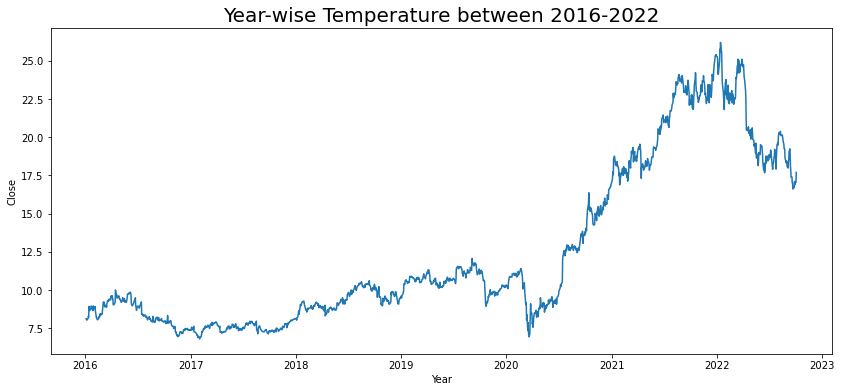

In [10]:
# Line Plot
plt.figure(figsize=(14,6))
plt.plot(infy['Close'])
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Year-wise Temperature between 2016-2022',size = 20)
plt.show()

In [11]:
print("Min:",infy.index.min())
print("Max:",infy.index.max())

Min: 2016-01-04 00:00:00
Max: 2022-10-04 00:00:00


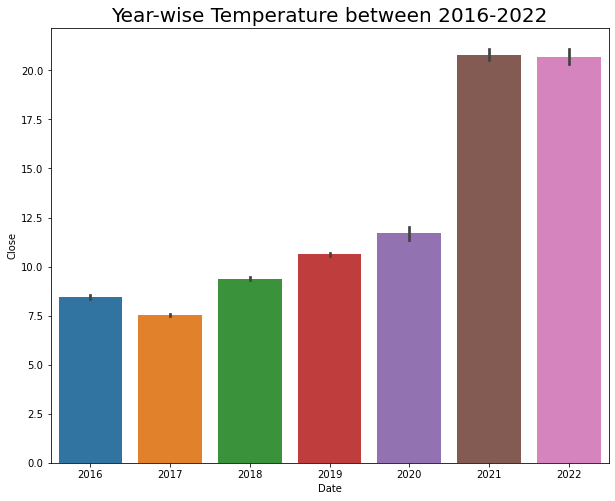

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=infy.index.year, y=infy['Close'])
plt.title('Year-wise Temperature between 2016-2022',size = 20)
plt.show()

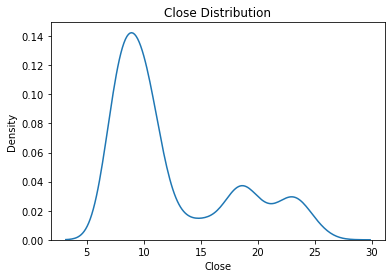

In [13]:
sns.distplot(a=infy['Close'],hist=False)
plt.title("Close Distribution")
plt.show()

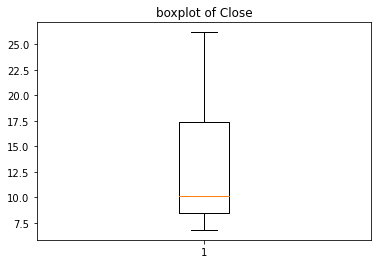

In [14]:
plt.boxplot(x='Close',data=infy)
plt.title("boxplot of Close")
plt.show()

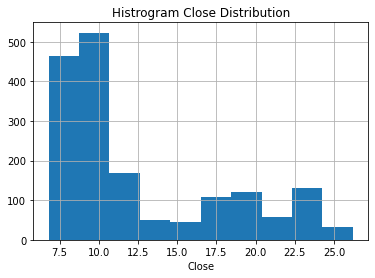

In [15]:
infy["Close"].hist()
plt.title("Histrogram Close Distribution")
plt.xlabel("Close")
plt.show()

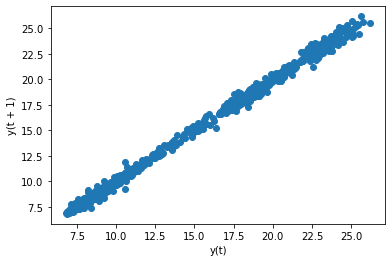

In [16]:
# Scatter Plot

from pandas.plotting import lag_plot
lag_plot(infy["Close"])
plt.show()

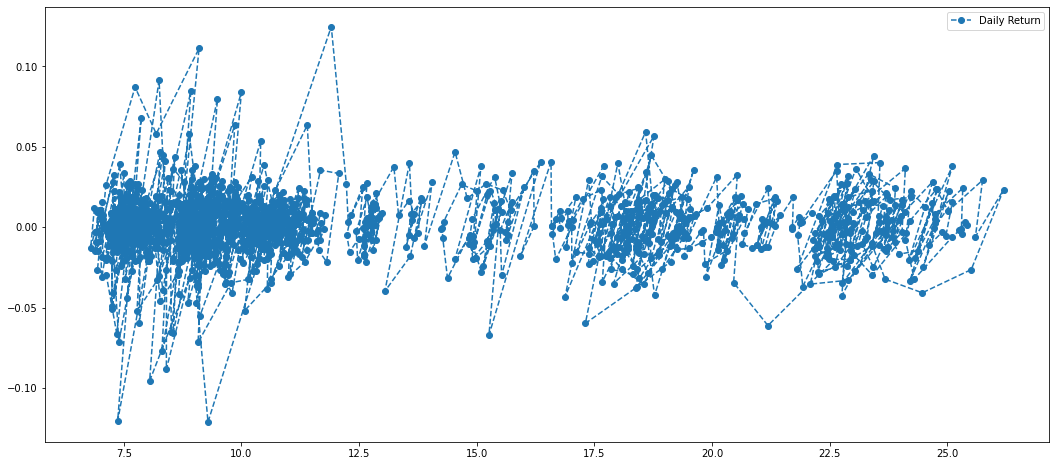

In [17]:
#We'll use pct_change to find the percent change for each day
infy['Daily Return'] = infy['Close'].pct_change()

# Lets plot the daily return percentage
plt.figure(figsize = (18,8))
plt.plot(infy['Close'],infy['Daily Return'],linestyle='--', marker='o')
plt.legend(['Daily Return'])
plt.show()

<AxesSubplot:ylabel='Date'>

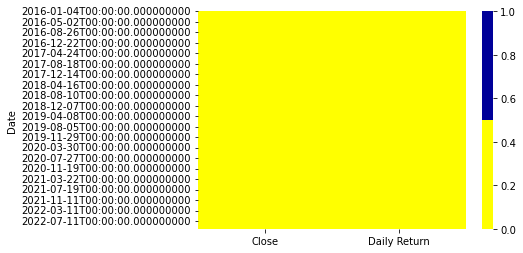

In [18]:
# Missing Values and Imputation :
import seaborn as sns

cols = infy.columns 
colours = ['#ffff00','#000099'] 

sns.heatmap(infy[cols].isnull(),
            cmap=sns.color_palette(colours))

In [19]:
infy['Data']=pd.to_datetime(infy.index,format="%Y-%m-%d")
infy['Month']=infy['Data'].dt.strftime("%b")
infy['Year']=infy['Data'].dt.strftime("%Y")

In [20]:
infy

,Close,Daily Return,Data,Month,Year
Date,,,,,
2016-01-04,8.120000,NaN,2016-01-04,Jan,2016
2016-01-05,8.100000,-0.002463,2016-01-05,Jan,2016
2016-01-06,8.035000,-0.008025,2016-01-06,Jan,2016
2016-01-07,8.030000,-0.000622,2016-01-07,Jan,2016
2016-01-08,8.085000,0.006849,2016-01-08,Jan,2016
...,...,...,...,...,...
2022-09-28,17.110001,0.019059,2022-09-28,Sep,2022
2022-09-29,16.900000,-0.012274,2022-09-29,Sep,2022
2022-09-30,16.969999,0.004142,2022-09-30,Sep,2022


<AxesSubplot:xlabel='Month', ylabel='Year'>

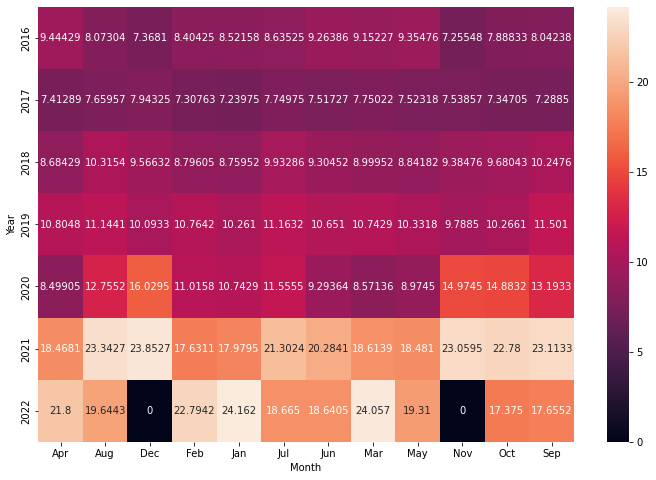

In [21]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=infy,values="Close",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 

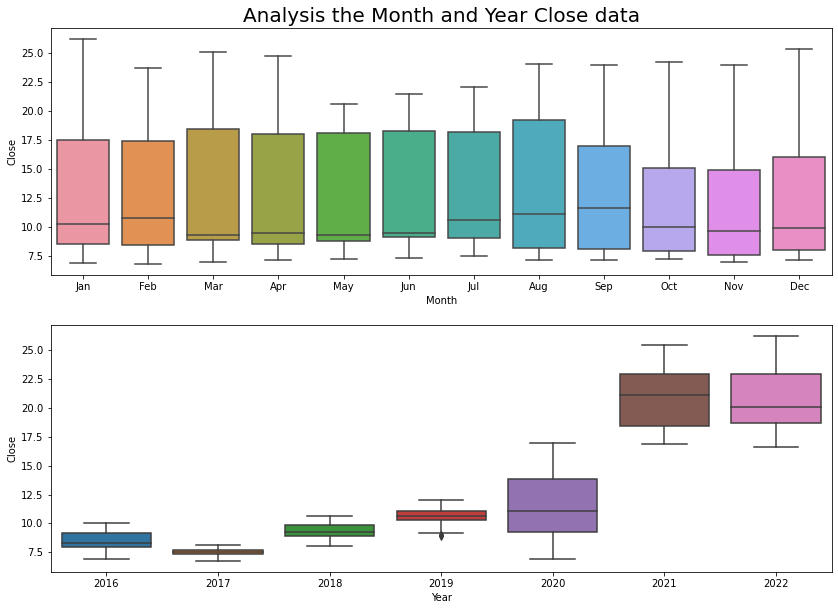

In [22]:
# Boxplot for ever
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title("Analysis the Month and Year Close data",size=20)
sns.boxplot(x="Month",y="Close",data=infy)
plt.subplot(2,1,2)
sns.boxplot(x="Year",y="Close",data=infy)
plt.show()

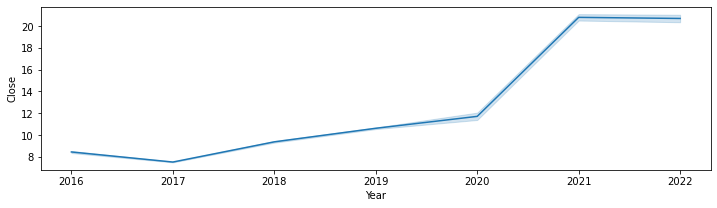

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Close",data=infy)
plt.show()

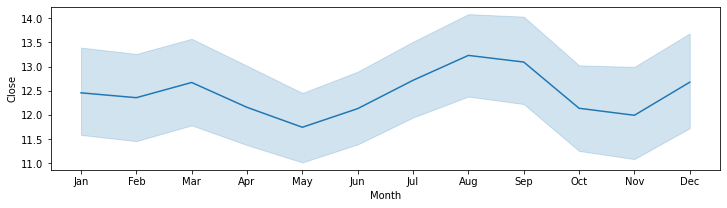

In [24]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Close",data=infy)
plt.show()

# Forecasting-Model Based Model

In [25]:
# Data preprocessing for models:
data_model=infy[['Close']].copy()
data_model.head()

,Close
Date,
2016-01-04,8.120
2016-01-05,8.100
2016-01-06,8.035
2016-01-07,8.030
2016-01-08,8.085


In [26]:
data_model["t"]=np.arange(1,1702)
data_model["t_squared"]=data_model["t"]*data_model["t"]
data_model['log_Close']=np.log(data_model["Close"])
data_model.tail()

,Close,t,t_squared,log_Close
Date,,,,
2022-09-28,17.110001,1697,2879809,2.839663
2022-09-29,16.900000,1698,2883204,2.827314
2022-09-30,16.969999,1699,2886601,2.831447
2022-10-03,17.049999,1700,2890000,2.836150
2022-10-04,17.700001,1701,2893401,2.873565


In [27]:
# Splitting data into Training and Testing
train_model=data_model.head(1361)
test_model=data_model.tail(340)

In [28]:
train_model.head(5)

,Close,t,t_squared,log_Close
Date,,,,
2016-01-04,8.120,1,1,2.094330
2016-01-05,8.100,2,4,2.091864
2016-01-06,8.035,3,9,2.083807
2016-01-07,8.030,4,16,2.083185
2016-01-08,8.085,5,25,2.090010


In [29]:
test_model.head(5)

,Close,t,t_squared,log_Close
Date,,,,
2021-06-01,19.270000,1362,1855044,2.958549
2021-06-02,19.290001,1363,1857769,2.959587
2021-06-03,19.139999,1364,1860496,2.951780
2021-06-04,19.290001,1365,1863225,2.959587
2021-06-07,19.400000,1366,1865956,2.965273


In [30]:
print("Train model data shape :",train_model.shape)
print("Test model data Shape : ",test_model.shape)

Train model data shape : (1361, 4)
Test model data Shape :  (340, 4)


# Creating RMSE And MAPE Function:

In [31]:
# RMSE

def RMSE(org,pred):
    rmse_1=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse_1

In [32]:
#MAPE

def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

# Linear Model:

In [33]:
import statsmodels.formula.api as smf

linear_model=smf.ols("Close~t",data=train_model).fit()

pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test_model['t'])))

MAPE_linear_model=MAPE(pred_linear,test_model["Close"])
print("MAPE Value of Linear Model :",MAPE_linear_model)

rmse_linear_model=RMSE(test_model["Close"],pred_linear)
print("RMSE value of linear Model : ",rmse_linear_model)

MAPE Value of Linear Model : 28.858208246249326
RMSE value of linear Model :  6.943243489495325


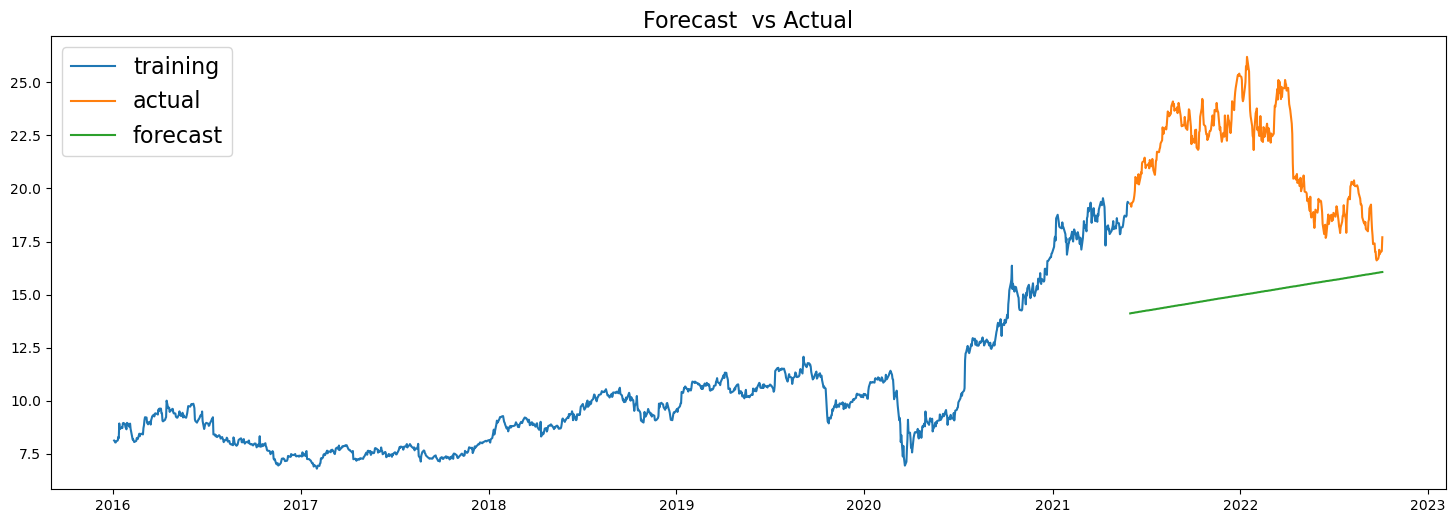

In [34]:
# plot
plt.figure(figsize=(18,6),dpi=100)
plt.plot(train_model["Close"],label='training')
plt.plot(test_model["Close"],label="actual")
plt.plot(pred_linear,label='forecast')
plt.title("Forecast  vs Actual",fontsize=16)
plt.legend(loc='upper left',fontsize=16)
plt.show()

In [35]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1829.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          6.78e-254
Time:                        19:33:41   Log-Likelihood:                -2838.0
No. Observations:                1361   AIC:                             5680.
Df Residuals:                    1359   BIC:                             5690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2817      0.106     59.435      0.000       6.074       6.489
t              0.0057      0.000     42.768      0.000       0.005       0.006
==============================================================================
Omnibus:                       84.670   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.522
Skew:                           0.595   Prob(JB):                     3.32e-23
Kurtosis:                       3.641   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Expontential Model:

In [36]:
import statsmodels.formula.api as smf

Exp = smf.ols('log_Close~t',data=train_model).fit()

pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_model['t'])))

MAPE_Exp_model = MAPE(np.exp(pred_Exp),test_model['Close'])
print("MAPE value of Exponential Model :",MAPE_Exp_model)

rmse_Exp_model = RMSE(test_model['Close'],np.exp(pred_Exp))
print("RMSE value of Exponential Model :",rmse_Exp_model)

MAPE value of Exponential Model : 28.47051894854425
RMSE value of Exponential Model : 6.935147642078583


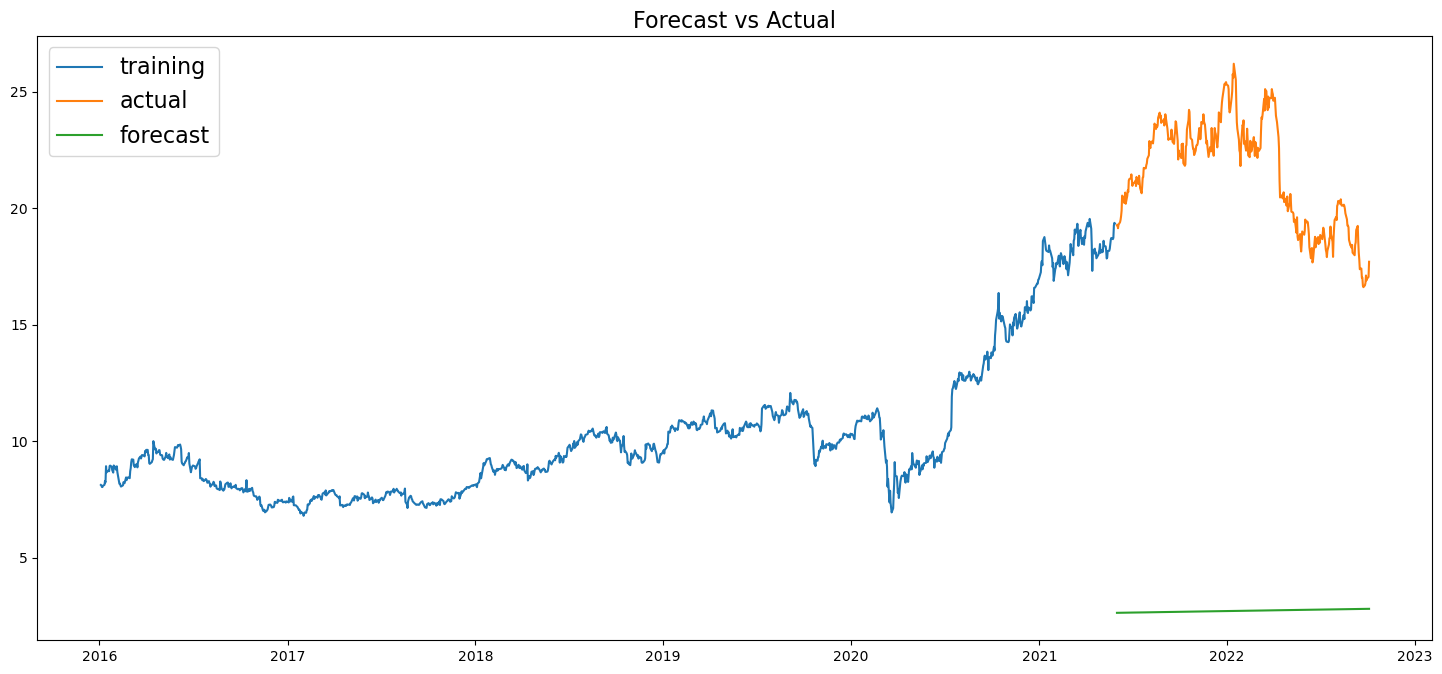

In [37]:
# Plot4
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_model["Close"], label='training')
plt.plot(test_model["Close"], label='actual')
plt.plot(pred_Exp, label='forecast')
plt.title('Forecast vs Actual', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [38]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Close   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2129.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          2.08e-280
Time:                        19:33:42   Log-Likelihood:                 572.71
No. Observations:                1361   AIC:                            -1141.
Df Residuals:                    1359   BIC:                            -1131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9421      0.009    225.221      0.000       1.925       1.959
t              0.0005    1.1e-05     46.137      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.496   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.379
Skew:                           0.131   Prob(JB):                        0.112
Kurtosis:                       3.093   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Quadratic Model

In [39]:
import statsmodels.formula.api as smf

Quad = smf.ols('Close~t+t_squared',data=train_model).fit()

pred_Quad = pd.Series(Quad.predict(test_model[["t","t_squared"]]))

MAPE_Quad_model = MAPE( pred_Quad,test_model['Close'])
print("MAPE value of Quadratic Model :",MAPE_Quad_model)

rmse_Quad_model = RMSE(test_model['Close'], pred_Quad)
print("RMSE value of Quadratic Model :",rmse_Quad_model)

MAPE value of Quadratic Model : 18.12001257583735
RMSE value of Quadratic Model : 4.051068240648597


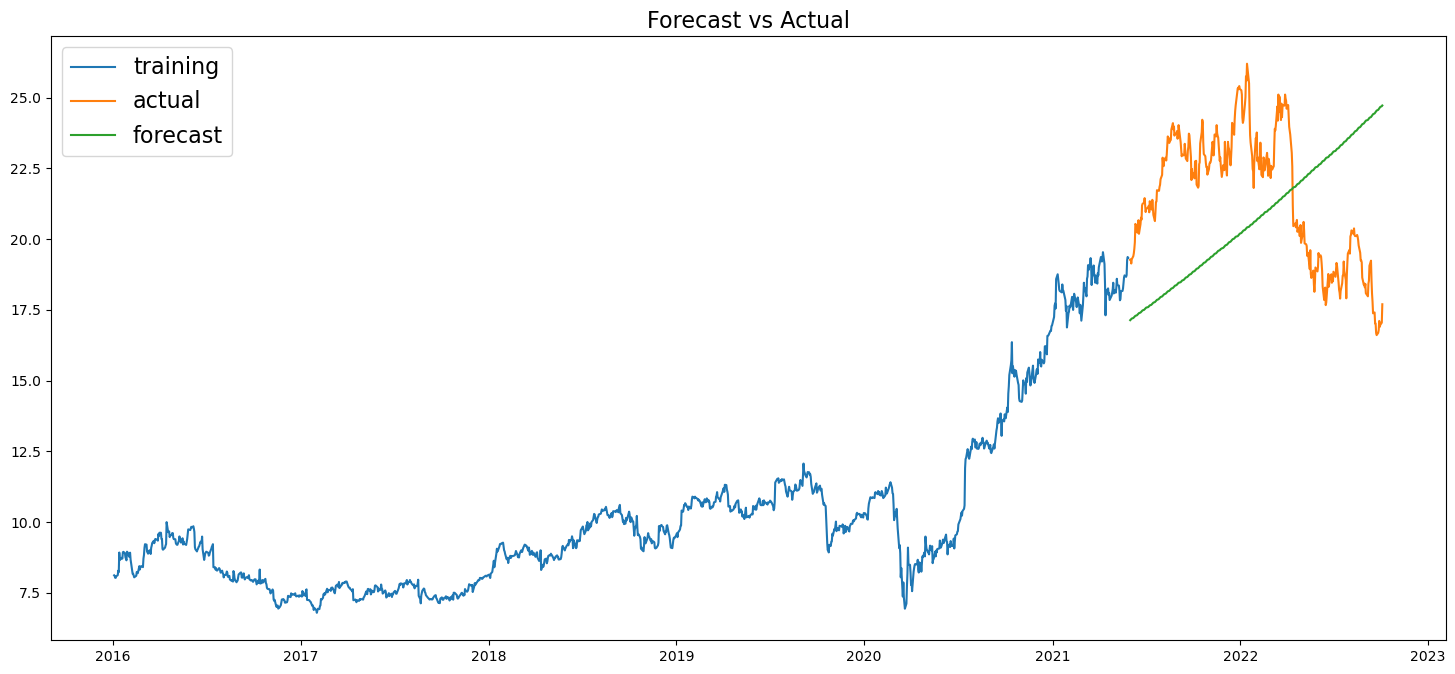

In [40]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_model["Close"], label='training')
plt.plot(test_model["Close"], label='actual')
plt.plot(pred_Quad, label='forecast')
plt.title('Forecast vs Actual', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [41]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     2388.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:33:43   Log-Likelihood:                -2392.1
No. Observations:                1361   AIC:                             4790.
Df Residuals:                    1358   BIC:                             4806.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3067      0.114     81.357      0.000       9.082       9.531
t             -0.0076      0.000    -19.508      0.000      -0.008      -0.007
t_squared   9.777e-06   2.76e-07     35.453      0.000    9.24e-06    1.03e-05
==============================================================================
Omnibus:                      245.225   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.296
Skew:                          -1.068   Prob(JB):                    2.27e-104
Kurtosis:                       4.963   Cond. No.                     2.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#Compare the results 

data = {"MODEL":pd.Series(["linear_model","Exp_model","Quad_model"]),
        "RMSE_Values":pd.Series([rmse_linear_model,rmse_Exp_model,rmse_Quad_model]),
        "MAPE_Values":pd.Series([MAPE_linear_model,MAPE_Exp_model,MAPE_Quad_model])
       }
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values',"MAPE_Values"])

,MODEL,RMSE_Values,MAPE_Values
2,Quad_model,4.051068,18.120013
1,Exp_model,6.935148,28.470519
0,linear_model,6.943243,28.858208


* ACF -plot Between lags and values of correlation
* PACF - Partial Auto- Correlation of function ,plot between lags and residuals
* (Basically instead of Finding corrleation of present with lags like ACF ,it finds correlation of te residuals)

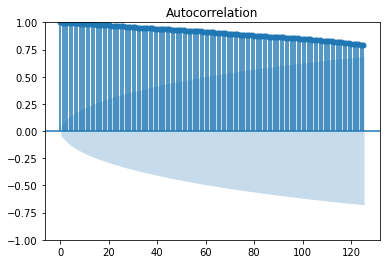

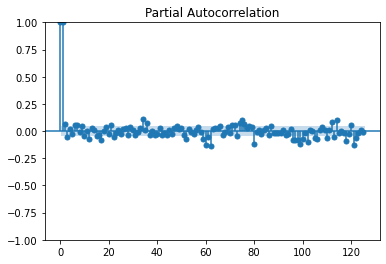

In [43]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(infy.Close,lags=125)
tsa_plots.plot_pacf(infy.Close,lags=125)
plt.show()

# Time Series Decompostion plot

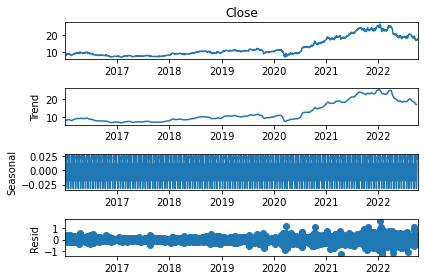

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(infy['Close'],period=12)
decompose_ts_add.plot()
plt.show()

# Data Driven Forcasting

* Moving Average

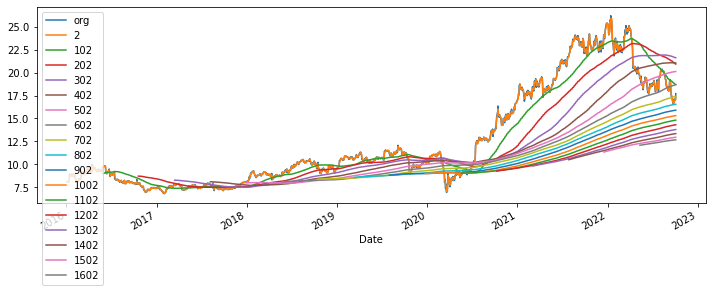

In [45]:
plt.figure(figsize=(12,4))
infy['Close'].plot(label="org")
for i in range(2,1701,100):
    infy['Close'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [46]:
#Data is non-stationary so we will use differencing
# Differencing :

df_first_difference = infy[["Close"]] - infy[["Close"]].shift(1)

df_first_difference.head()

,Close
Date,
2016-01-04,NaN
2016-01-05,-0.020
2016-01-06,-0.065
2016-01-07,-0.005
2016-01-08,0.055


In [47]:
# Test for Stationarity (Dickey Fuller Test) :

from statsmodels.tsa.stattools import adfuller

def TestStationaryAdfuller(infy, cutoff = 0.01):
    df_test = adfuller(infy, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

In [48]:
#Define Stationary Plot

def TestStationaryPlot(infy):
    rol_mean = infy.rolling(window = 20, center = False).mean()
    rol_std = infy.rolling(window = 20, center = False).std()
    
    plt.figure(figsize=(12,6))
    plt.plot(infy, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.xlabel('Time in Years', fontsize = 12)
    plt.ylabel('Total Emissions', fontsize = 12)
    plt.legend(loc='best', fontsize = 12)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 12)
    plt.show(block= True)

In [49]:
# Test for Stationarity

#dataframe df

TestStationaryAdfuller(infy["Close"].dropna(inplace=False))

Test Statistic                   -0.882893
p-value                           0.793554
#Lags Used                        2.000000
Number of Observations Used    1698.000000
Critical Value (1%)              -3.434207
Critical Value (5%)              -2.863244
Critical Value (10%)             -2.567677
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


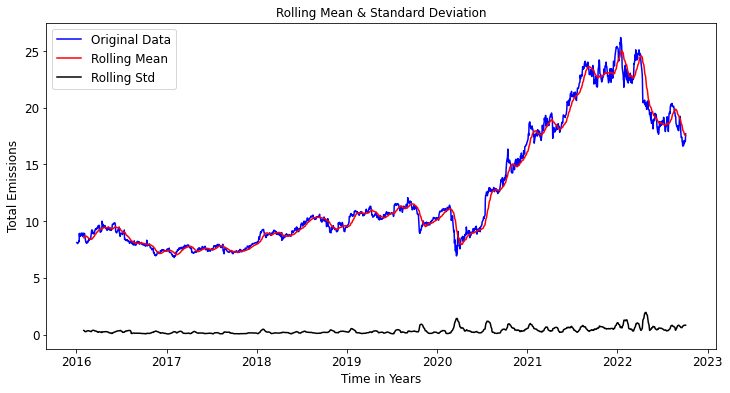

In [50]:
TestStationaryPlot(infy["Close"])

In [51]:
#Data is non-stationary so we will use differencing
# Differencing :

df_first_difference = infy[["Close"]] - infy[["Close"]].shift(1)

df_first_difference.head()

,Close
Date,
2016-01-04,NaN
2016-01-05,-0.020
2016-01-06,-0.065
2016-01-07,-0.005
2016-01-08,0.055


In [52]:
# test dickey fuller test on differenced data
# dataframe df_first_difference

TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -27.980759
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1698.000000
Critical Value (1%)              -3.434207
Critical Value (5%)              -2.863244
Critical Value (10%)             -2.567677
dtype: float64
Failed to reject null hypothesis. Data is stationary


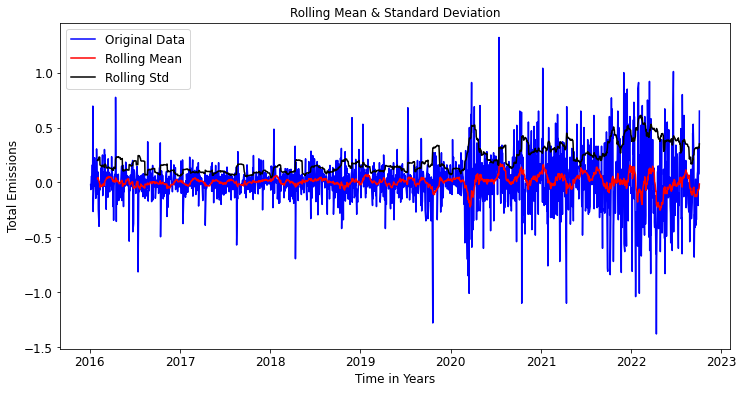

In [53]:
TestStationaryPlot(df_first_difference)

* The first Difference improves the Stationarity of the series Significantly.
* Let Us Use the Seasonal First Order difference to remove the seasonality of the data and see how that impacts Stationary of the data

In [54]:
#Seasonal First order differencing

data_seasonal_first_difference = df_first_difference - df_first_difference.shift(12)

data_seasonal_first_difference.head()

,Close
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN


In [55]:
## Again test dickey fuller test on data_CO2_seasonal_first_difference

TestStationaryAdfuller(data_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.265074e+01
p-value                        1.370119e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.664000e+03
Critical Value (1%)           -3.434286e+00
Critical Value (5%)           -2.863278e+00
Critical Value (10%)          -2.567696e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


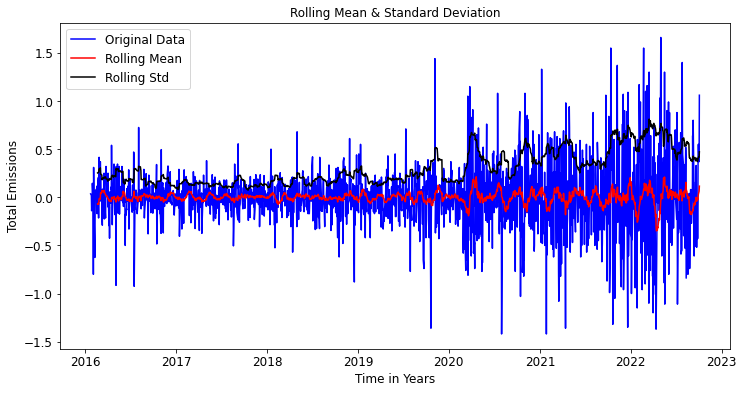

In [56]:
TestStationaryPlot(data_seasonal_first_difference)

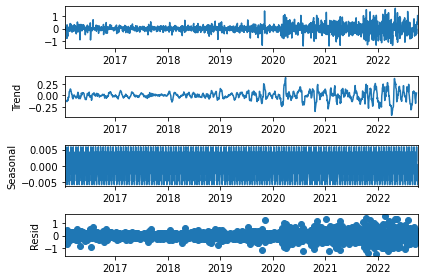

<Figure size 864x432 with 0 Axes>

In [57]:
#Time Series Decomposition Plot for data_seasonal_first_difference :

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decomposition = seasonal_decompose(data_seasonal_first_difference.dropna(),period=12)
ts_decomposition.plot()
plt.figure(figsize=(12,6))
plt.show()

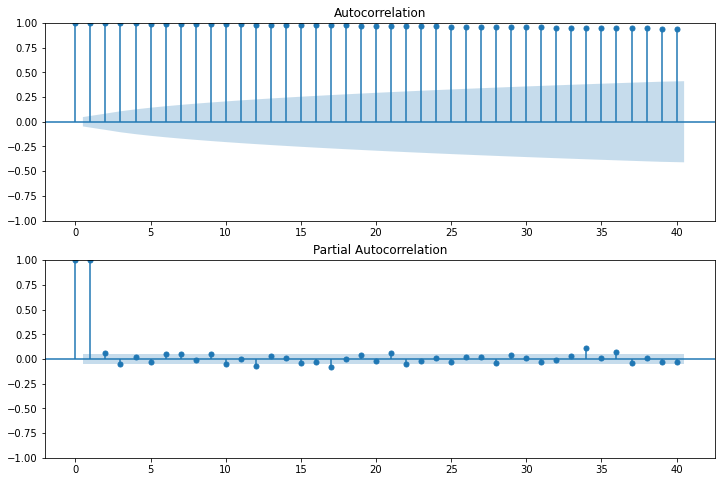

In [58]:
#ACF and PACF plot
#Non-Stationary Data

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(infy["Close"],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(infy["Close"],lags=40,ax=ax2)

# Data Pre-Processing :

In [59]:
# Normalizing Dataset :

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from numpy import set_printoptions

In [60]:
# Non-Stationary Data :
scaler = MinMaxScaler(feature_range=(1,5))
df_scaled = scaler.fit_transform(np.array(infy["Close"]).reshape(-1,1))

# Stationary Data :
scaler = MinMaxScaler(feature_range=(1,5))
df_seasonal_scaled = scaler.fit_transform(np.array(data_seasonal_first_difference.dropna()).reshape(-1,1))

In [61]:
# summarize transformed non-stationary data :

set_printoptions(precision=4)
print(df_scaled[:,:])

[[1.2731]
 [1.269 ]
 [1.2556]
 ...
 [3.0974]
 [3.1139]
 [3.2479]]


In [62]:
# summarize transformed stationary data :

set_printoptions(precision=4)
print(df_seasonal_scaled[:,:])

[[2.8896]
 [2.8701]
 [2.6623]
 ...
 [3.5584]
 [3.3247]
 [4.2208]]


In [63]:
# Splitting the non-stationary dataset :

training_size = int(len(df_scaled)*0.70)
test_size = len(df_scaled) - training_size
train_data, test_data = df_scaled[0:training_size,:], df_scaled[training_size:len(df_scaled),:]

# Splitting the stationary dataset :

training_seasonal_size = int(len(df_seasonal_scaled)*0.70)
test_seasonal_size = len(df_seasonal_scaled) - training_seasonal_size
train_seasonal_data, test_seasonal_data = df_seasonal_scaled[0:training_seasonal_size,:], df_seasonal_scaled[training_seasonal_size:len(df_seasonal_scaled),:]
                                                                                                                                       

In [64]:
print([train_data])

[array([[1.2731],
       [1.269 ],
       [1.2556],
       ...,
       [2.4048],
       [2.4522],
       [2.4007]])]


In [65]:
print([test_data])

[array([[2.2894],
       [2.3965],
       [2.4089],
       [2.3945],
       [2.446 ],
       [2.4357],
       [2.4172],
       [2.4955],
       [2.4625],
       [2.5965],
       [2.6501],
       [2.7325],
       [2.8047],
       [2.8397],
       [2.9717],
       [2.7449],
       [2.7964],
       [2.7202],
       [2.7676],
       [2.7614],
       [2.7635],
       [2.7367],
       [2.6748],
       [2.6604],
       [2.5635],
       [2.5429],
       [2.5408],
       [2.5367],
       [2.547 ],
       [2.6254],
       [2.6934],
       [2.6769],
       [2.6563],
       [2.5965],
       [2.7099],
       [2.681 ],
       [2.7511],
       [2.7861],
       [2.749 ],
       [2.6893],
       [2.6563],
       [2.6728],
       [2.7696],
       [2.8006],
       [2.7119],
       [2.6748],
       [2.7367],
       [2.7696],
       [2.7758],
       [2.7408],
       [2.8459],
       [2.8191],
       [2.8995],
       [2.8006],
       [2.7944],
       [2.8439],
       [2.8274],
       [2.8171],
       [2.827

In [66]:
# Shape of Non-Stationary dataset :

print("Trained data shape : ", train_data.shape)
print("Test data shape : ", test_data.shape)

Trained data shape :  (1190, 1)
Test data shape :  (511, 1)


In [67]:
print(train_seasonal_data)

[[2.8896]
 [2.8701]
 [2.6623]
 ...
 [3.4156]
 [3.1169]
 [2.5455]]


In [68]:
print(test_seasonal_data)

[[2.5455]
 [2.6494]
 [2.4416]
 [3.1948]
 [2.8571]
 [3.5455]
 [2.8831]
 [3.6883]
 [4.    ]
 [2.3896]
 [3.5974]
 [1.5065]
 [2.8442]
 [2.4286]
 [3.2597]
 [2.3117]
 [3.0649]
 [1.8312]
 [2.1169]
 [2.2338]
 [1.7792]
 [2.4935]
 [2.    ]
 [4.2468]
 [2.5844]
 [3.8182]
 [2.974 ]
 [2.7792]
 [2.7013]
 [2.6364]
 [3.9481]
 [2.7532]
 [3.8961]
 [3.1948]
 [2.6234]
 [2.4935]
 [2.5714]
 [2.4545]
 [3.026 ]
 [3.1429]
 [2.4156]
 [2.987 ]
 [2.5195]
 [3.2338]
 [2.4416]
 [2.4026]
 [3.7403]
 [3.052 ]
 [3.5584]
 [2.1169]
 [2.1948]
 [2.961 ]
 [3.2987]
 [3.013 ]
 [2.5195]
 [3.3507]
 [2.8182]
 [2.6883]
 [3.026 ]
 [3.026 ]
 [2.3507]
 [3.6883]
 [2.8701]
 [2.7532]
 [2.974 ]
 [3.2987]
 [3.2987]
 [2.2338]
 [2.5974]
 [4.5714]
 [2.2208]
 [2.6234]
 [2.6104]
 [2.3507]
 [2.7922]
 [2.5584]
 [3.1818]
 [2.1948]
 [2.2987]
 [2.4026]
 [2.987 ]
 [1.    ]
 [2.8442]
 [2.0649]
 [3.7143]
 [3.1948]
 [3.1818]
 [2.8312]
 [2.5325]
 [3.5325]
 [2.4545]
 [3.    ]
 [3.3636]
 [3.6494]
 [2.2078]
 [3.6364]
 [2.4935]
 [2.9091]
 [2.1429]
 [2.6234]


In [69]:
# Shape of Stationary dataset :

print("Trained data shape : ", train_seasonal_data.shape)
print("Test data shape : ", test_seasonal_data.shape)

Trained data shape :  (1181, 1)
Test data shape :  (507, 1)


# Model Evaluation :

Forecasting  -Data Driven Models :

Simple Exponential Methods:

In [70]:
#Simple Exponential Method
#MAPE value
#RMSE value

from statsmodels.tsa.api import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = training_size, end = len(df_scaled))

MAPE_ses_model=MAPE(pred_ses, test_data) 
print("MAPE value of Simple Exponential Method :",MAPE_ses_model)

rmse_ses_model = RMSE(test_data, pred_ses)
print("RMSE value of Simple Exponential Method :",rmse_ses_model)

MAPE value of Simple Exponential Method : 33.416083109943195
RMSE value of Simple Exponential Method : 1.4509004097678853


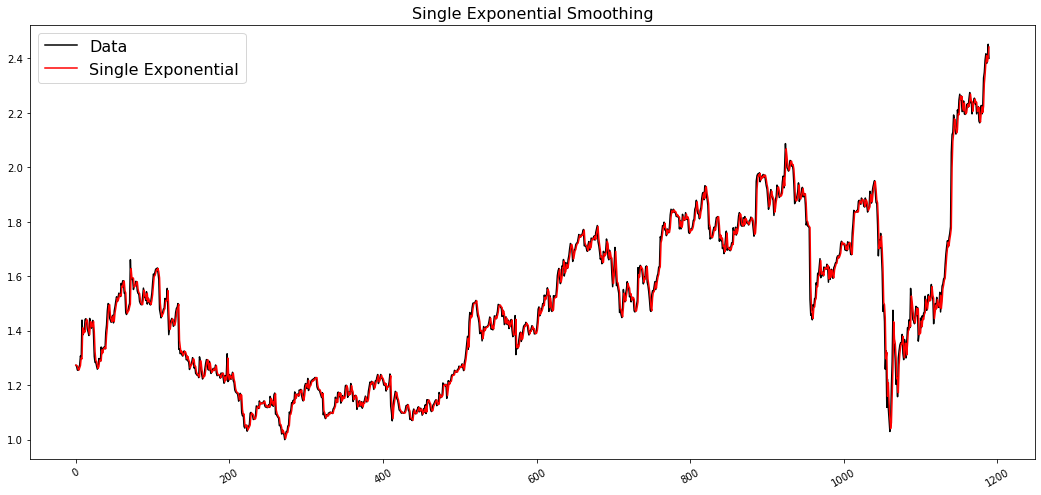

In [71]:
# Exponential Smoothing-Single:

data_SE = train_data

fit1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8, optimized=False)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black", label='Data') 

plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, color="red",label='Single Exponential')

plt.title('Single Exponential Smoothing', fontsize=16)

plt.legend(loc='upper left', fontsize=16)

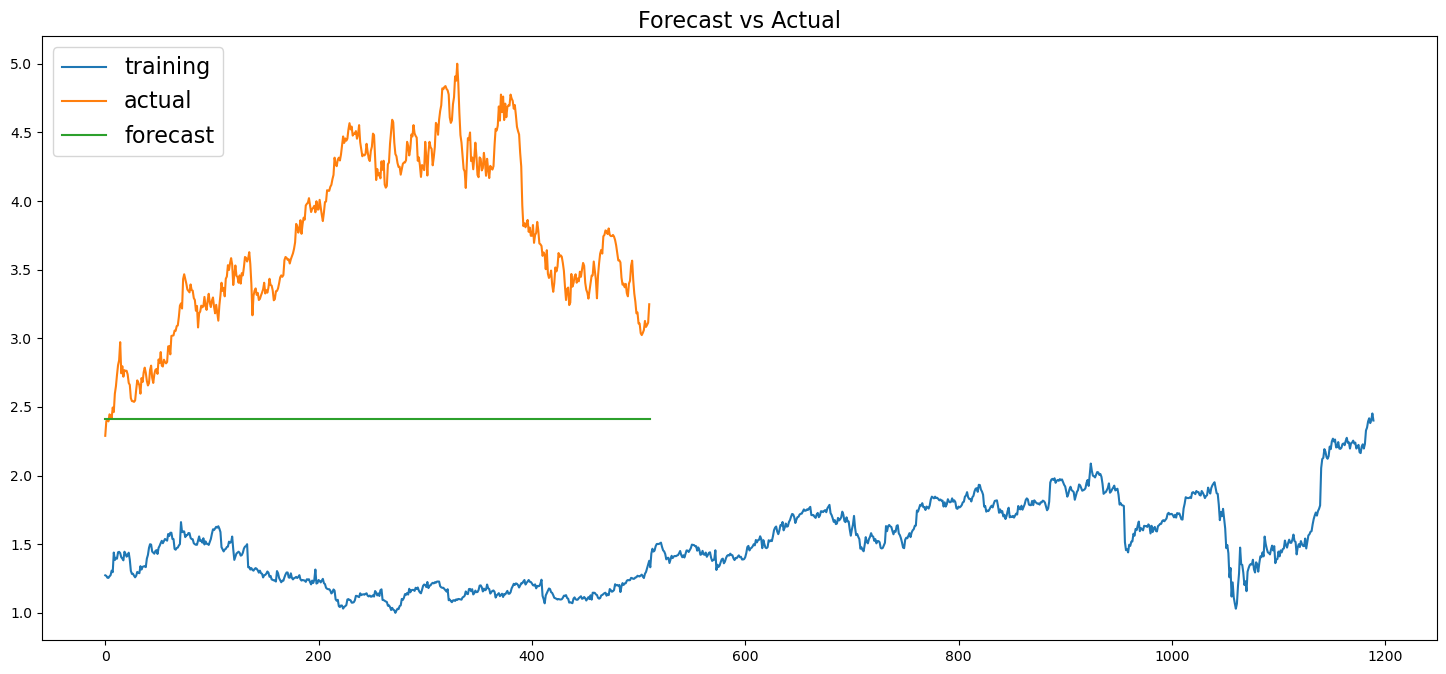

In [72]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actual', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

Holt's Method :

In [73]:
#Holt method
#MAPE value
#RMSE value

from statsmodels.tsa.api import Holt

hw_model = Holt(train_data).fit(smoothing_level=0.8, smoothing_slope=0.2)

pred_hw = hw_model.predict(start = training_size,end = len(df_scaled))

MAPE_hw_model= MAPE(pred_hw,test_data) 
print("MAPE value of Holt's Model :",MAPE_hw_model)

rmse_hw_model = RMSE(test_data,pred_hw)
print("RMSE value of Holt's Model :",rmse_hw_model)

MAPE value of Holt's Model : 49.71131801552512
RMSE value of Holt's Model : 2.1312405044307265


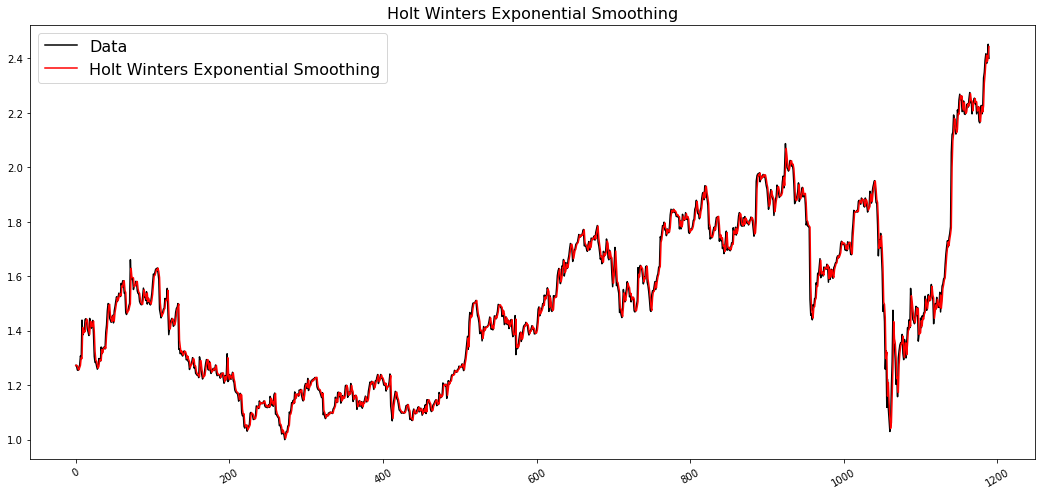

In [74]:
#Plot

data_SE = train_data

fit2 = Holt(train_data, exponential=True).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black", label='Data') 

plt.xticks(rotation=30)

plt.plot(fit2.fittedvalues, color="red",label = "Holt Winters Exponential Smoothing")

plt.title('Holt Winters Exponential Smoothing', fontsize = 16)

plt.legend(loc='upper left', fontsize=16)

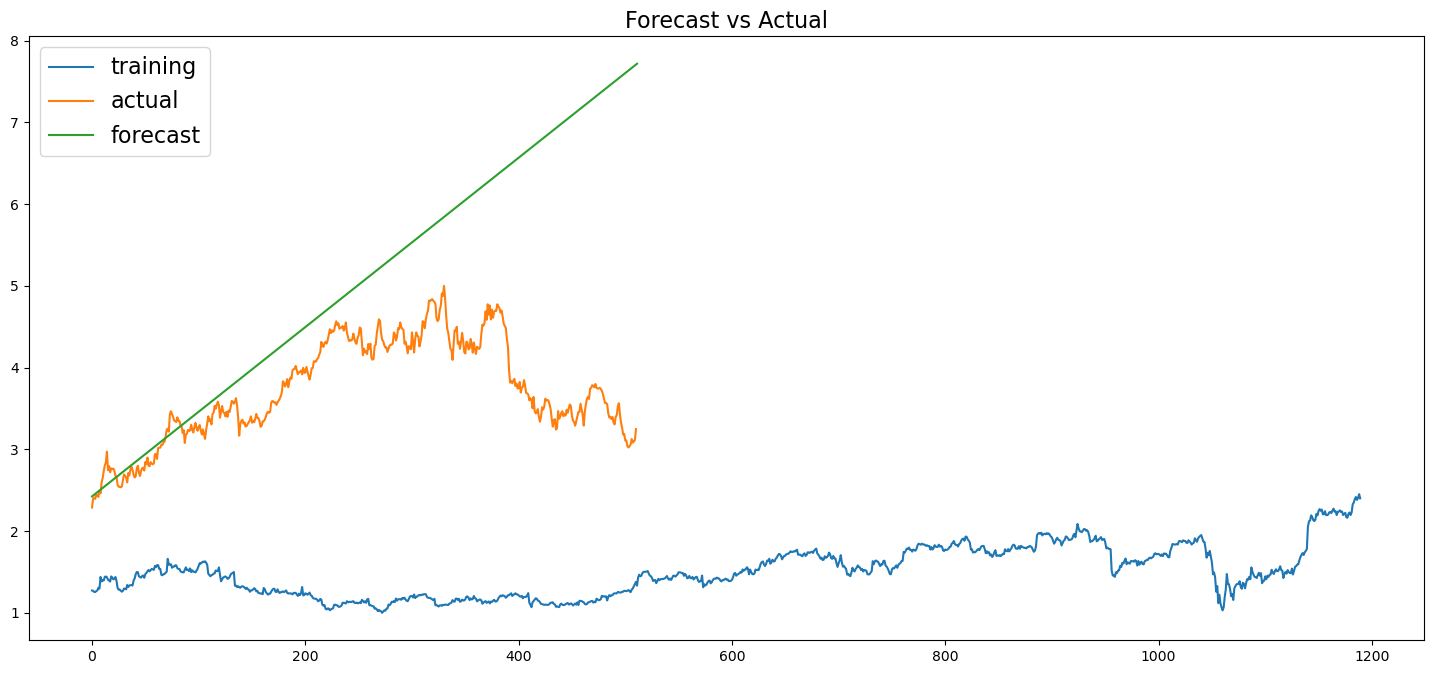

In [75]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend :

In [76]:
#Holts winter exponential smoothing with additive seasonality and additive trend
#MAPE value
#RMSE value

from statsmodels.tsa.api import ExponentialSmoothing

hwe_model_add_add = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit()

pred_hwe_add_add = hwe_model_add_add.predict(start = training_size,end = len(df_scaled))

MAPE_hwe_add_add_model=MAPE(pred_hwe_add_add,test_data)  
print("MAPE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend :",MAPE_hwe_add_add_model)

rmse_hwe_add_add_model = RMSE(test_data, pred_hwe_add_add)
print("RMSE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend :",rmse_hwe_add_add_model)

MAPE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend : 27.3230091768362
RMSE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend : 1.2437932783963035


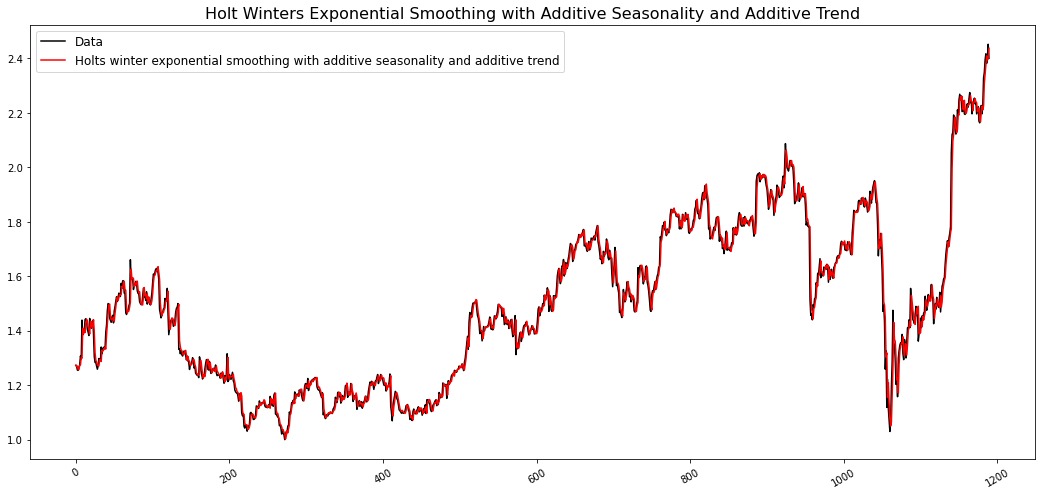

In [77]:
data_SE = train_data

fit3 = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black",label="Data")

plt.xticks(rotation=30)

plt.plot(fit3.fittedvalues, color="red",label="Holts winter exponential smoothing with additive seasonality and additive trend")

plt.title('Holt Winters Exponential Smoothing with Additive Seasonality and Additive Trend', fontsize=16)

plt.legend(loc='upper left', fontsize=12)

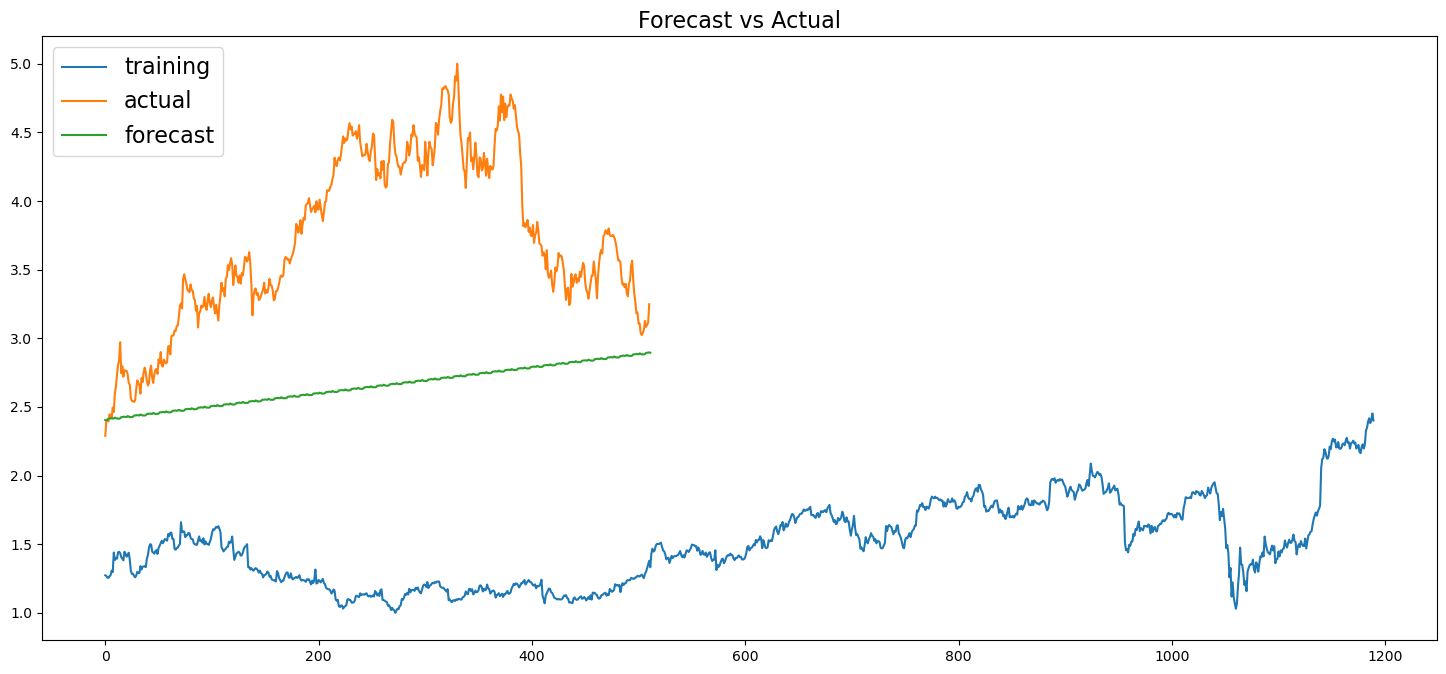

In [78]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend :

In [79]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
#MAPE value
#RMSE value

from statsmodels.tsa.api import ExponentialSmoothing

hwe_model_mul_add = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit()

pred_hwe_mul_add = hwe_model_mul_add.predict(start = training_size,end = len(df_scaled))

MAPE_hwe_mul_add_model=MAPE(pred_hwe_mul_add,test_data)  
print("MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend :",MAPE_hwe_mul_add_model)

rmse_hwe_mul_add_model = RMSE(test_data, pred_hwe_mul_add)
print("RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend :",rmse_hwe_mul_add_model)

MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend : 27.283850406268947
RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend : 1.2423875631268606


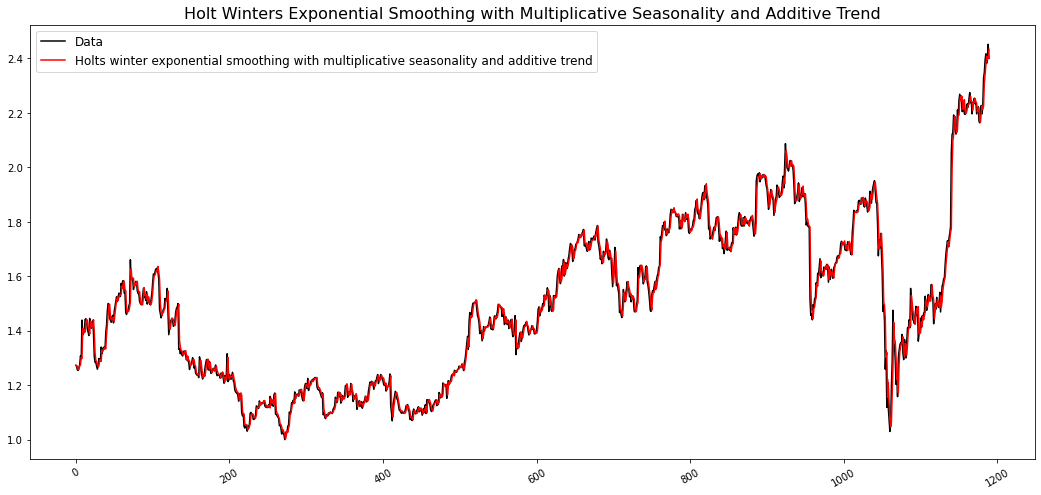

In [80]:
#Plot

data_SE = train_data

fit4 = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black",label="Data")

plt.xticks(rotation=30)

plt.plot(fit4.fittedvalues, color="red",label="Holts winter exponential smoothing with multiplicative seasonality and additive trend")

plt.title('Holt Winters Exponential Smoothing with Multiplicative Seasonality and Additive Trend', fontsize=16)

plt.legend(loc='upper left', fontsize=12)

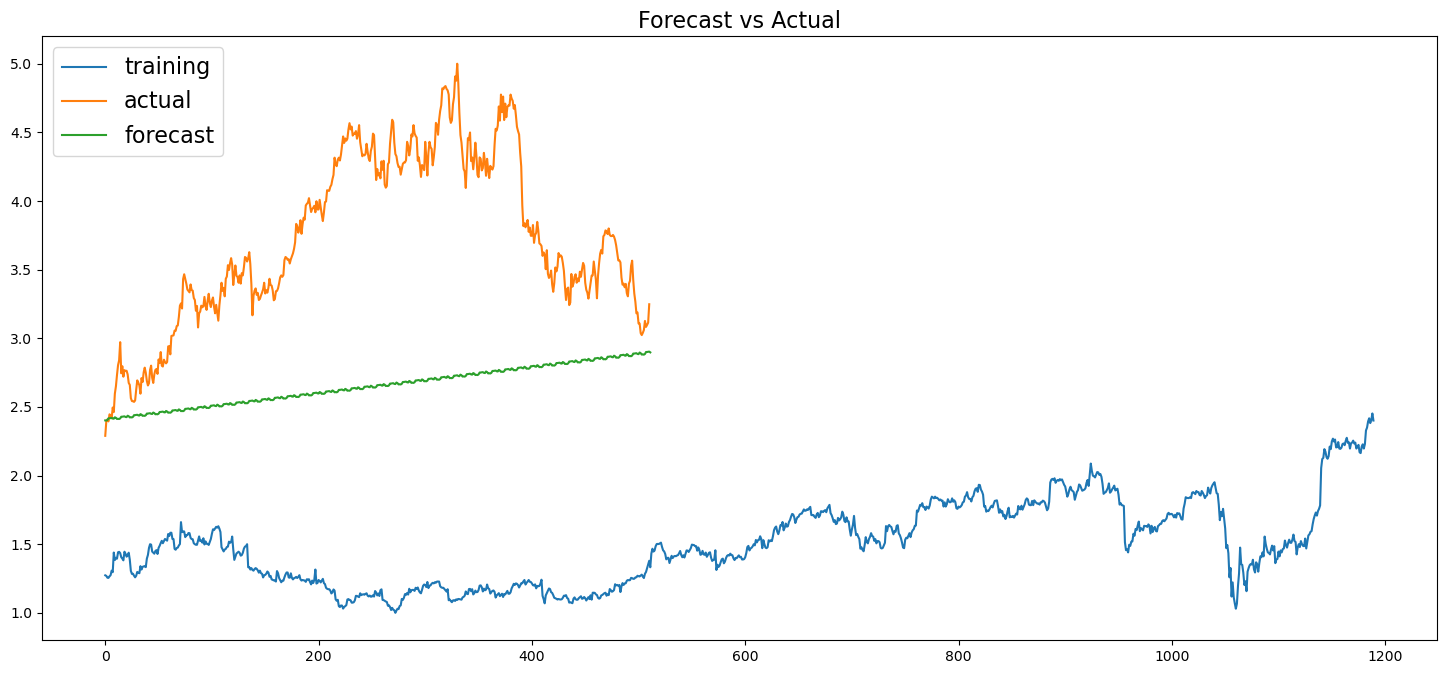

In [81]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend :

In [82]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
#MAPE value
#RMSE value

from statsmodels.tsa.api import ExponentialSmoothing

hwe_model_mul_mul = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit()

pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = training_size,end = len(df_scaled))

MAPE_hwe_mul_mul_model=MAPE(pred_hwe_mul_mul,test_data)  
print("MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend :",MAPE_hwe_mul_mul_model)

rmse_hwe_mul_mul_model = RMSE(test_data, pred_hwe_mul_mul)
print("RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplication Trend :",rmse_hwe_mul_mul_model)

MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend : 24.902894848282234
RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplication Trend : 1.1568765048381537


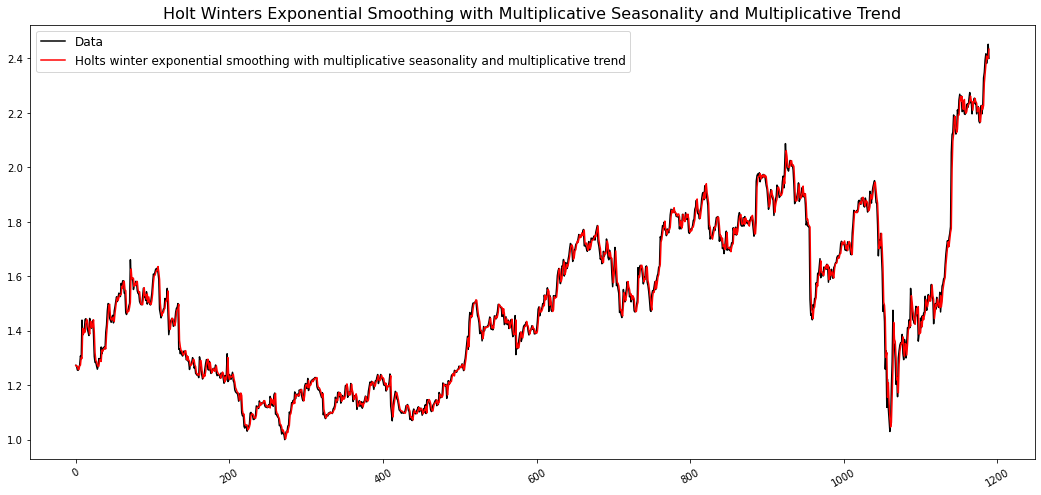

In [83]:
#Plot

data_SE = train_data

fit4 = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black",label="Data")

plt.xticks(rotation=30)

plt.plot(fit4.fittedvalues, color="red",label="Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend")

plt.title('Holt Winters Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend', fontsize=16)

plt.legend(loc='upper left', fontsize=12)

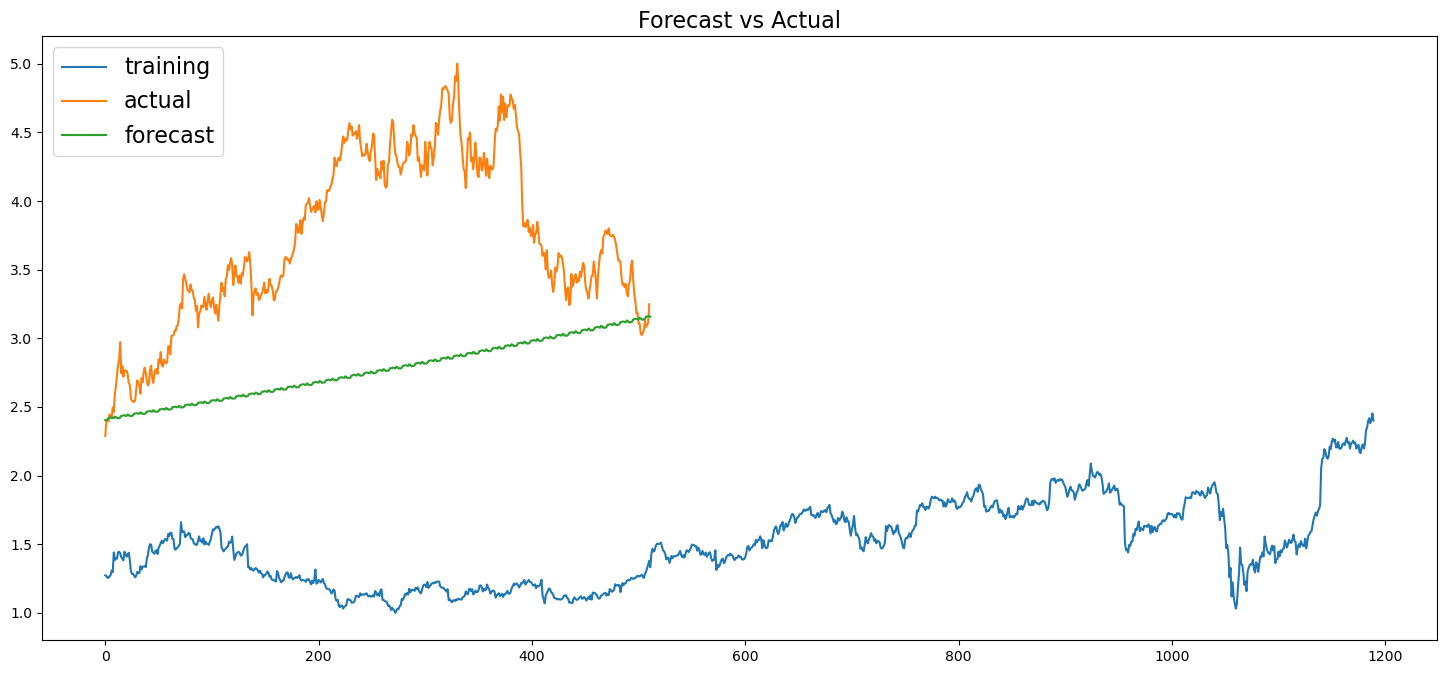

In [84]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

# Model -Arima ,Auto -Regressor,Moving Average:

ARIMA Model(Non-Stationary Dataset):

In [85]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [86]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [87]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [88]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.960
ARIMA(0, 0, 1) RMSE=1.009
ARIMA(0, 0, 2) RMSE=0.590
ARIMA(0, 1, 0) RMSE=0.075
ARIMA(0, 1, 1) RMSE=0.075
ARIMA(0, 1, 2) RMSE=0.075
ARIMA(0, 2, 0) RMSE=0.106
ARIMA(0, 2, 1) RMSE=0.075
ARIMA(0, 2, 2) RMSE=0.075
ARIMA(1, 0, 0) RMSE=0.075
ARIMA(1, 0, 1) RMSE=0.075
ARIMA(1, 0, 2) RMSE=0.075
ARIMA(1, 1, 0) RMSE=0.075
ARIMA(1, 1, 1) RMSE=0.075
ARIMA(1, 1, 2) RMSE=0.075
ARIMA(1, 2, 0) RMSE=0.091
ARIMA(1, 2, 1) RMSE=0.075
ARIMA(1, 2, 2) RMSE=0.075
ARIMA(2, 0, 0) RMSE=0.075
ARIMA(2, 0, 1) RMSE=0.075
ARIMA(2, 0, 2) RMSE=0.075
ARIMA(2, 1, 0) RMSE=0.075
ARIMA(2, 1, 1) RMSE=0.075
ARIMA(2, 1, 2) RMSE=0.075
ARIMA(2, 2, 0) RMSE=0.086
ARIMA(2, 2, 1) RMSE=0.075
ARIMA(2, 2, 2) RMSE=0.075
Best ARIMA(0, 1, 0) RMSE=0.075


In [89]:
#0,1,0
model_arima = ARIMA(train_data,order = (0,1,0))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1190
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2323.509
Date:                Sat, 26 Nov 2022   AIC                          -4645.017
Time:                        11:47:48   BIC                          -4639.936
Sample:                             0   HQIC                         -4643.102
                               - 1190                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0012    1.9e-05     61.788      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   3.49   Jarque-Bera (JB):              5872.40
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
### make prediction on test set
start = len(train_seasonal_data)
end = len(train_seasonal_data)+len(test_seasonal_data)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

[2.1966 2.2296 2.3285 2.3491 2.3945 2.4172 2.3821 2.4048 2.4522 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007 2.4007
 2.400

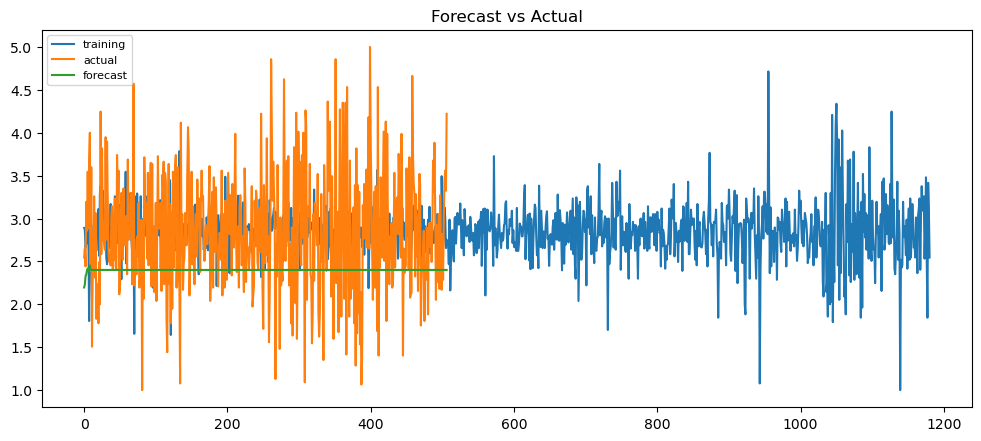

In [91]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_seasonal_data, label='training')
plt.plot(test_seasonal_data, label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [92]:
RMSE_ARIMA_NS = RMSE(test_seasonal_data,pred_arima)
print("RMSE Value of ARIMA Model :",RMSE_ARIMA_NS)

MAPE_ARIMA_NS = MAPE(pred_arima, test_seasonal_data)
print("MAPE Value of ARIMA Model :",MAPE_ARIMA_NS)

RMSE Value of ARIMA Model : 0.811726589112165
MAPE Value of ARIMA Model : 21.79522623550747


Auto-Regressor Model: 

In [93]:
model_ar = AutoReg(train_seasonal_data,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1181
Model:                     AutoReg(6)   Log Likelihood                -266.469
Method:               Conditional MLE   S.D. of innovations              0.304
Date:                Sat, 26 Nov 2022   AIC                            548.938
Time:                        11:47:49   BIC                            589.491
Sample:                             6   HQIC                           564.230
                                 1181                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0095      0.206     14.605      0.000       2.606       3.413
y.L1          -0.0284      0.029     -0.974      0.330      -0.086       0.029
y.L2           0.0571      0.029      1.956      0.0

In [94]:
### make prediction on test set
start = len(train_seasonal_data)
end = len(train_seasonal_data)+len(test_seasonal_data)-1
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

[2.9095 2.782  2.8584 2.8509 2.8349 2.8541 2.8409 2.8458 2.8443 2.8436
 2.8447 2.844  2.8444 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443 2.8443
 2.844

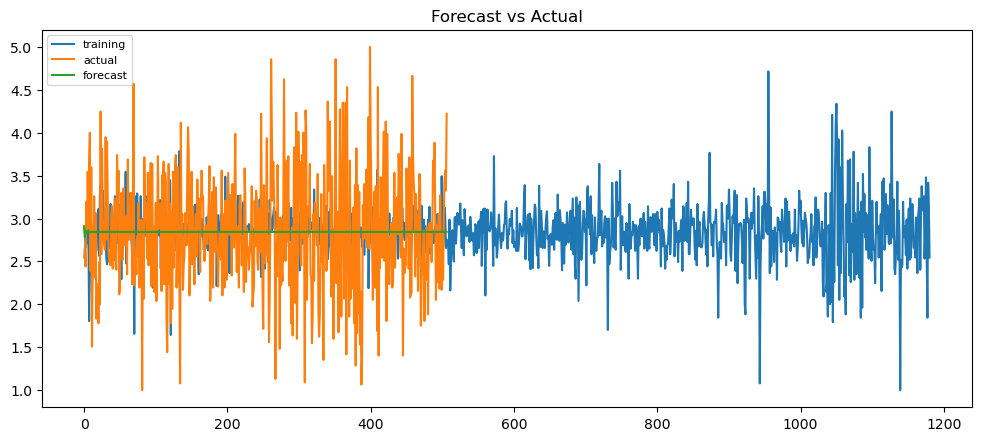

In [95]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_seasonal_data, label='training')
plt.plot(test_seasonal_data, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [96]:
RMSE_AR = RMSE(test_seasonal_data,pred_ar)
print("RMSE Value of AR Model :",RMSE_AR)

MAPE_AR = MAPE(pred_ar, test_seasonal_data)
print("MAPE Value of AR Model :",MAPE_AR)

RMSE Value of AR Model : 0.6799826463292051
MAPE Value of AR Model : 21.351181665855457


Moving Average Model

In [97]:
#(0,1,0)
model_ma = ARIMA(train_seasonal_data,order = (0,1,0))
model_ma = model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1181
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -697.015
Date:                Sat, 26 Nov 2022   AIC                           1396.031
Time:                        11:47:50   BIC                           1401.104
Sample:                             0   HQIC                          1397.943
                               - 1181                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1908      0.005     40.812      0.000       0.182       0.200
===================================================================================
Ljung-Box (L1) (Q):                 346.27   Jarque-Bera (JB):               654.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
### make prediction on test set
start = len(train_seasonal_data)
end = len(train_seasonal_data)+len(test_seasonal_data)-1
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)

[2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.545

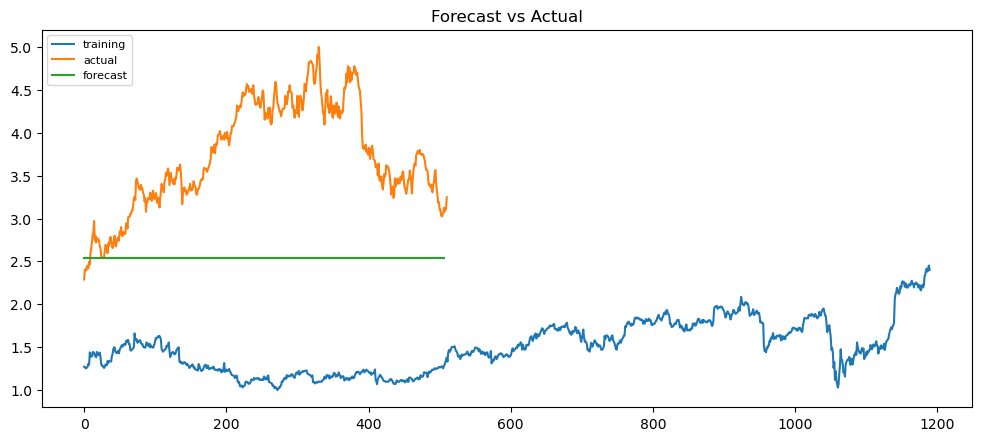

In [99]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [100]:
RMSE_MA = RMSE(test_seasonal_data,pred_ma)
print("RMSE Value of AR Model :",RMSE_MA)

MAPE_MA = MAPE(pred_ma, test_seasonal_data)
print("MAPE Value of AR Model :",MAPE_MA)

RMSE Value of AR Model : 0.7421906276470158
MAPE Value of AR Model : 20.612277939392193


# ARIMA Model(Stationary Data Set):

In [101]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [102]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [103]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [104]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.960
ARIMA(0, 0, 1) RMSE=1.009
ARIMA(0, 0, 2) RMSE=0.590
ARIMA(0, 1, 0) RMSE=0.075
ARIMA(0, 1, 1) RMSE=0.075
ARIMA(0, 1, 2) RMSE=0.075
ARIMA(0, 2, 0) RMSE=0.106
ARIMA(0, 2, 1) RMSE=0.075
ARIMA(0, 2, 2) RMSE=0.075
ARIMA(1, 0, 0) RMSE=0.075
ARIMA(1, 0, 1) RMSE=0.075
ARIMA(1, 0, 2) RMSE=0.075
ARIMA(1, 1, 0) RMSE=0.075
ARIMA(1, 1, 1) RMSE=0.075
ARIMA(1, 1, 2) RMSE=0.075
ARIMA(1, 2, 0) RMSE=0.091
ARIMA(1, 2, 1) RMSE=0.075
ARIMA(1, 2, 2) RMSE=0.075
ARIMA(2, 0, 0) RMSE=0.075
ARIMA(2, 0, 1) RMSE=0.075
ARIMA(2, 0, 2) RMSE=0.075
ARIMA(2, 1, 0) RMSE=0.075
ARIMA(2, 1, 1) RMSE=0.075
ARIMA(2, 1, 2) RMSE=0.075
ARIMA(2, 2, 0) RMSE=0.086
ARIMA(2, 2, 1) RMSE=0.075
ARIMA(2, 2, 2) RMSE=0.075
Best ARIMA(0, 1, 0) RMSE=0.075


In [105]:
#0,1,0
model_arima = ARIMA(train_seasonal_data,order = (0,1,0))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1181
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -697.015
Date:                Sun, 27 Nov 2022   AIC                           1396.031
Time:                        10:43:37   BIC                           1401.104
Sample:                             0   HQIC                          1397.943
                               - 1181                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1908      0.005     40.812      0.000       0.182       0.200
===================================================================================
Ljung-Box (L1) (Q):                 346.27   Jarque-Bera (JB):               654.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
### make prediction on test set
start = len(train_seasonal_data)
end = len(train_seasonal_data)+len(test_seasonal_data)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)


[2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455 2.5455
 2.545

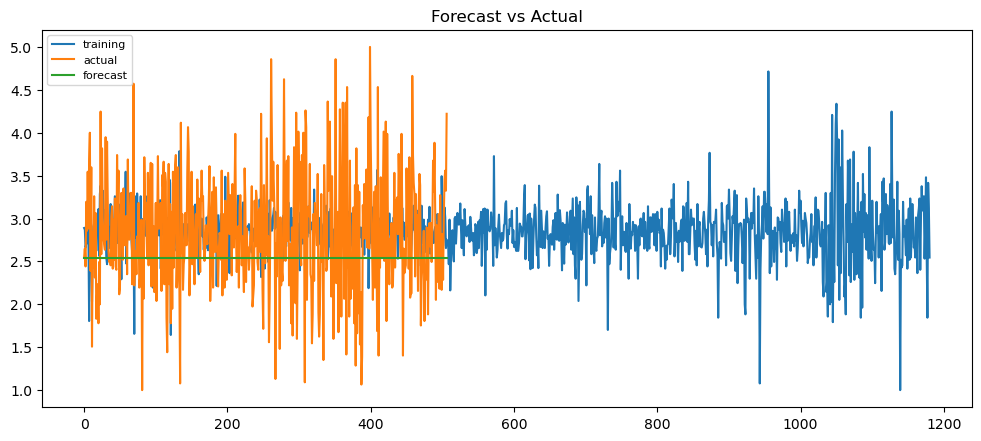

In [107]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_seasonal_data, label='training')
plt.plot(test_seasonal_data, label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [108]:
RMSE_ARIMA_S = RMSE(test_seasonal_data,pred_arima)
print("RMSE Value of ARIMA Model :",RMSE_ARIMA_S)

MAPE_ARIMA_S = MAPE(pred_arima, test_seasonal_data)
print("MAPE Value of ARIMA Model :",MAPE_ARIMA_S)

RMSE Value of ARIMA Model : 0.7421906276470158
MAPE Value of ARIMA Model : 20.612277939392193


# LSTM Model:

In [109]:
df = pd.read_csv("Infosys.csv", header=0, index_col=0, parse_dates=True)
df.head(1)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,8.23,8.23,8.115,8.12,6.762979,8218400


In [110]:
df.drop(["High","Low","Open","Volume","Adj Close"],axis=1,inplace=True)
df.head()

,Close
Date,
2016-01-04,8.120
2016-01-05,8.100
2016-01-06,8.035
2016-01-07,8.030
2016-01-08,8.085


In [111]:
df.shape

(1701, 1)

In [112]:
# Splitting the dataset :

data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1190, 1)
(511, 1)


In [113]:
# Normalizing dataset :

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [114]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.1881],
       [0.1852],
       [0.176 ],
       ...,
       [0.9674],
       [1.    ],
       [0.9645]])

In [115]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [116]:
!pip install keras

In [117]:
!pip install tensorflow

In [118]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [119]:
model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu", return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [120]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
35/35 [==============================] - 38s 645ms/step - loss: 0.0739
Epoch 2/50
35/35 [==============================] - 22s 628ms/step - loss: 0.0518
Epoch 3/50
35/35 [==============================] - 25s 710ms/step - loss: 0.0510
Epoch 4/50
35/35 [==============================] - 23s 644ms/step - loss: 0.0506
Epoch 5/50
35/35 [==============================] - 22s 626ms/step - loss: 0.0500
Epoch 6/50
35/35 [==============================] - 23s 641ms/step - loss: 0.0497
Epoch 7/50
35/35 [==============================] - 22s 615ms/step - loss: 0.0492
Epoch 8/50
35/35 [==============================] - 21s 605ms/step - loss: 0.0487
Epoch 9/50
35/35 [==============================] - 21s 604ms/step - loss: 0.0489
Epoch 10/50
35/35 [==============================] - 22s 625ms/step - loss: 0.0484
Epoch 11/50
35/35 [==============================] - 22s 626ms/step - loss: 0.0486
Epoch 12/50
35/35 [==============================] - 22s 618ms/step - loss: 0.0481
Epoch 13/50
3

In [121]:
data_testing.head()

,Close
Date,
2020-09-24,13.05
2020-09-25,13.57
2020-09-28,13.63
2020-09-29,13.56
2020-09-30,13.81


In [122]:
past_100_days = data_training.tail(100)

In [123]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [124]:
final_df.head()

,Close
0,8.93
1,8.91
2,8.86
3,9.04
4,9.17


In [125]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0215],
       [0.0204],
       [0.0176],
       [0.0278],
       [0.0351],
       [0.0255],
       [0.034 ],
       [0.    ],
       [0.0074],
       [0.0085],
       [0.0232],
       [0.0136],
       [0.0255],
       [0.0215],
       [0.0283],
       [0.0295],
       [0.0453],
       [0.0363],
       [0.0312],
       [0.0402],
       [0.047 ],
       [0.0408],
       [0.0408],
       [0.047 ],
       [0.0572],
       [0.0442],
       [0.0425],
       [0.0176],
       [0.0317],
       [0.038 ],
       [0.0323],
       [0.0442],
       [0.038 ],
       [0.0346],
       [0.034 ],
       [0.0493],
       [0.0295],
       [0.0419],
       [0.0555],
       [0.0578],
       [0.0629],
       [0.064 ],
       [0.0776],
       [0.0884],
       [0.0958],
       [0.1014],
       [0.0952],
       [0.1042],
       [0.1088],
       [0.1156],
       [0.1904],
       [0.2085],
       [0.2108],
       [0.2283],
       [0.2232],
       [0.2125],
       [0.2091],
       [0.2142],
       [0.2334

In [126]:
input_data.shape

(611, 1)

In [127]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]) :
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [128]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(511, 100, 1)
(511,)


In [129]:
# Making Predictions :

y_predicted = model.predict(x_test)

16/16 [==============================] - 5s 209ms/step


In [130]:
y_predicted.shape

(511, 100, 1)

In [131]:
y_test

array([0.255 , 0.2844, 0.2878, 0.2839, 0.298 , 0.2952, 0.2901, 0.3116,
       0.3025, 0.3394, 0.3541, 0.3768, 0.3966, 0.4062, 0.4425, 0.3802,
       0.3943, 0.3734, 0.3864, 0.3847, 0.3853, 0.3779, 0.3609, 0.3569,
       0.3303, 0.3246, 0.3241, 0.3229, 0.3258, 0.3473, 0.366 , 0.3615,
       0.3558, 0.3394, 0.3705, 0.3626, 0.3819, 0.3915, 0.3813, 0.3649,
       0.3558, 0.3603, 0.387 , 0.3955, 0.3711, 0.3609, 0.3779, 0.387 ,
       0.3887, 0.379 , 0.4079, 0.4006, 0.4227, 0.3955, 0.3938, 0.4074,
       0.4028, 0.4   , 0.4028, 0.434 , 0.4346, 0.4181, 0.455 , 0.4555,
       0.4561, 0.4657, 0.4652, 0.4748, 0.4759, 0.4929, 0.5156, 0.5201,
       0.5099, 0.5688, 0.5785, 0.5694, 0.5598, 0.5479, 0.545 , 0.5422,
       0.5581, 0.5467, 0.5456, 0.5309, 0.5269, 0.5054, 0.515 , 0.472 ,
       0.5003, 0.5037, 0.5156, 0.5122, 0.5144, 0.5331, 0.515 , 0.5071,
       0.5258, 0.5394, 0.5212, 0.5127, 0.5258, 0.532 , 0.5133, 0.5003,
       0.5173, 0.5008, 0.4856, 0.5161, 0.5365, 0.5615, 0.545 , 0.5513,
      

In [132]:
y_predicted

array([[[0.308 ],
        [0.3435],
        [0.352 ],
        ...,
        [0.3442],
        [0.3443],
        [0.3444]],

       [[0.308 ],
        [0.3435],
        [0.3519],
        ...,
        [0.3443],
        [0.3444],
        [0.3445]],

       [[0.308 ],
        [0.3436],
        [0.352 ],
        ...,
        [0.3444],
        [0.3445],
        [0.3446]],

       ...,

       [[0.3093],
        [0.3465],
        [0.3552],
        ...,
        [0.3494],
        [0.3493],
        [0.3492]],

       [[0.3093],
        [0.3465],
        [0.3552],
        ...,
        [0.3493],
        [0.3492],
        [0.3492]],

       [[0.3093],
        [0.3466],
        [0.3553],
        ...,
        [0.3492],
        [0.3492],
        [0.3491]]], dtype=float32)

In [133]:
RMSE_LSTM = RMSE(y_test,y_predicted)
print("RMSE Value of LSTM Model :",RMSE_LSTM)

MAPE_LSTM = MAPE(y_predicted, y_test)
print("MAPE Value of LSTM Model :",MAPE_LSTM)

RMSE Value of LSTM Model : 0.3440518838588561
MAPE Value of LSTM Model : 42.62796784996731


In [134]:
scaler.scale_

array([0.0567])

In [135]:
scaler_factor = 1/9.20234108e-05
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

ValueError: x and y can be no greater than 2D, but have shapes (511,) and (511, 100, 1)

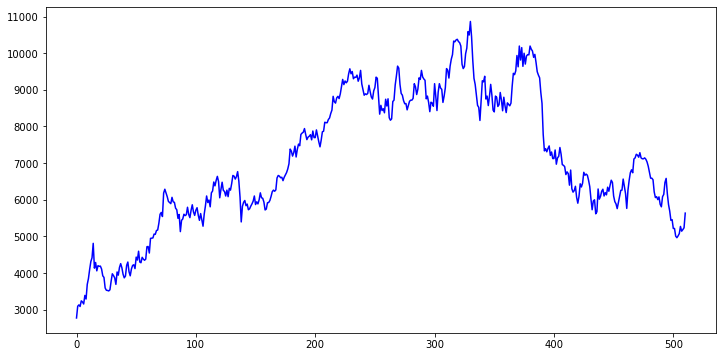

In [136]:
plt.figure(figsize=(12,6))
plt.plot(y_test, "b", label="Original Price")
plt.plot(y_predicted, "r", label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

Comparison of Models :

In [137]:
#Compare the results 

compare_model = {"MODEL":pd.Series(["Single Exponential","Holts Winter","Holts winter exp add sea and add trend","Holts winter exp mul sea and add trend","Holts winter exp mul sea and mul trend","Linear Model","Exponential Model","Quadratic Model","ARIMA Model(Non-Stationary)","Auto Regressor(Stationary)","Moving Average(Stationary)","ARIMA(Stationary)","LSTM"]),
                 "RMSE_Values" :pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_mul_add_model,rmse_hwe_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,RMSE_ARIMA_NS,RMSE_AR,RMSE_MA,RMSE_ARIMA_S,RMSE_LSTM])
                }
table_rmse=pd.DataFrame(compare_model)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
12,LSTM,0.344052
9,Auto Regressor(Stationary),0.679983
10,Moving Average(Stationary),0.742191
11,ARIMA(Stationary),0.742191
8,ARIMA Model(Non-Stationary),0.811727
3,Holts winter exp mul sea and add trend,1.242388
4,Holts winter exp mul sea and mul trend,1.242388
2,Holts winter exp add sea and add trend,1.243793
0,Single Exponential,1.450900
1,Holts Winter,2.131241


Final Model

In [138]:
df = pd.read_csv("Infosys.csv", header=0, index_col=0, parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,8.230,8.23,8.115,8.120,6.762979,8218400
2016-01-05,8.150,8.20,8.070,8.100,6.746321,7265800
2016-01-06,8.045,8.15,8.000,8.035,6.692183,7042000
2016-01-07,7.905,8.14,7.880,8.030,6.688020,7850400
2016-01-08,8.075,8.18,8.055,8.085,6.733828,8147400


In [139]:
data=df[['Close']].values
data

array([[ 8.12 ],
       [ 8.1  ],
       [ 8.035],
       ...,
       [16.97 ],
       [17.05 ],
       [17.7  ]])

In [140]:
#Using MinMaxScaler for normalizing data between 0 & 1 :

from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler(feature_range=(0,1))
data_scaled = normalizer.fit_transform(np.array(data).reshape(-1,1))

In [141]:
len(data_scaled)

1701

In [142]:
#Defining test and train dataset :

train_size = int(len(data_scaled)*0.70)
test_size = len(data_scaled) - train_size

print("Train Size :",train_size)
print("Test Size :",test_size)

Train Size : 1190
Test Size : 511


In [143]:
#Splitting data between train and test :

data_train, data_test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:1]

print("Training Size :",len(data_train))
print("Testing Size :",len(data_test))

Training Size : 1190
Testing Size : 511


In [144]:
#Creating dataset in time series for LSTM model : 

def create_data(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [145]:
#Taking 100 days price as one record for training :

time_stamp = 100

X_train, y_train = create_data(data_train,time_stamp)
X_test, y_test = create_data(data_test,time_stamp)

In [146]:
X_train.shape, y_train.shape

((1089, 100), (1089,))

In [147]:
X_test.shape, y_test.shape

((410, 100), (410,))

In [148]:
#Creating LSTM model using keras :

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [149]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
18/18 [==============================] - 34s 656ms/step - loss: 0.0038 - val_loss: 0.0216
Epoch 2/100
18/18 [==============================] - 8s 439ms/step - loss: 8.1367e-04 - val_loss: 0.0033
Epoch 3/100
18/18 [==============================] - 8s 431ms/step - loss: 7.2996e-04 - val_loss: 0.0045
Epoch 4/100
18/18 [==============================] - 8s 440ms/step - loss: 6.0690e-04 - val_loss: 0.0035
Epoch 5/100
18/18 [==============================] - 8s 425ms/step - loss: 5.8730e-04 - val_loss: 0.0045
Epoch 6/100
18/18 [==============================] - 8s 421ms/step - loss: 6.4497e-04 - val_loss: 0.0149
Epoch 7/100
18/18 [==============================] - 8s 442ms/step - loss: 0.0012 - val_loss: 0.0084
Epoch 8/100
18/18 [==============================] - 8s 442ms/step - loss: 5.5623e-04 - val_loss: 0.0170
Epoch 9/100
18/18 [==============================] - 8s 438ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 10/100
18/18 [==============================] - 8s 442ms/ste

In [180]:
model.save("keras_model.h5")

In [151]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [152]:
from tensorflow.keras.models import load_model

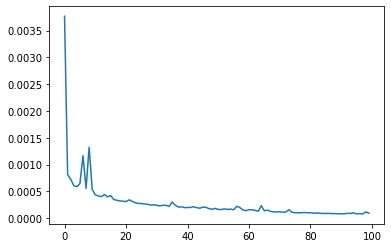

In [153]:
#PLotting loss, it shows that loss has decreased significantly and model trained well :

loss = model.history.history['loss']
plt.plot(loss)

In [154]:
#Predicitng on train and test data :

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

13/13 [==============================] - 1s 104ms/step


In [155]:
#Inverse transform to get actual value :

train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

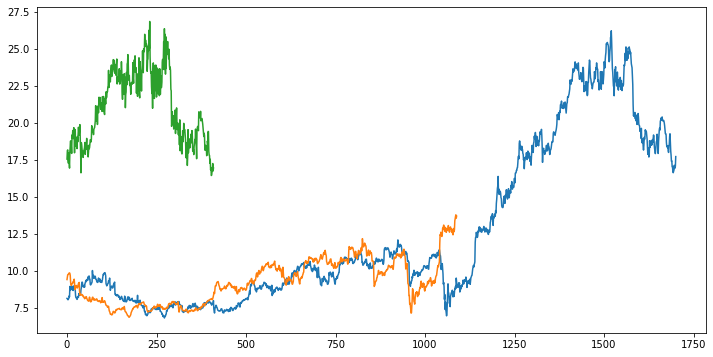

In [156]:
#Comparing using visuals :

plt.figure(figsize=(12,6))
plt.plot(normalizer.inverse_transform(data_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [157]:
type(train_predict)

numpy.ndarray

In [158]:
test = np.vstack((train_predict, test_predict))

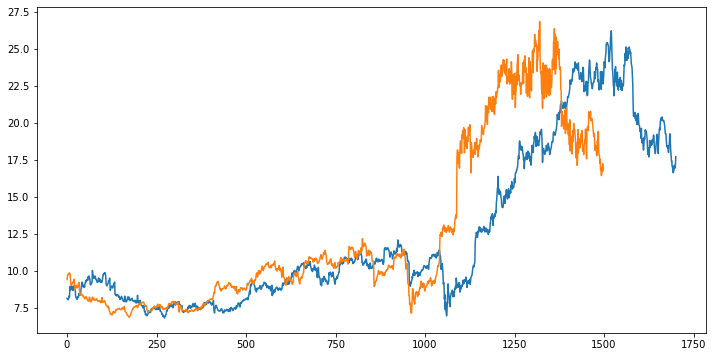

In [159]:
#Combining the predited data to create uniform data visualization :

plt.figure(figsize=(12,6))
plt.plot(normalizer.inverse_transform(data_scaled))
plt.plot(test)

In [160]:
len(data_test)

511

In [161]:
#Getting the last 100 days records :

fut_inp = data_test[411:]

In [162]:
fut_inp = fut_inp.reshape(1,-1)

In [163]:
tmp_inp = list(fut_inp)

In [164]:
fut_inp.shape

(1, 100)

In [165]:
#Creating list of the last 100 data :

tmp_inp = tmp_inp[0].tolist()

In [166]:
#Predicting next 30 days price suing the current data :
#It will predict in sliding window manner (algorithm) with stride 1 :

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.5860928297042847], [0.6085218191146851], [0.6278656125068665], [0.6477257013320923], [0.6715001463890076], [0.7016188502311707], [0.739128828048706], [0.7839391231536865], [0.8353588581085205], [0.8926022052764893], [0.9550255537033081], [1.0220184326171875], [1.092633605003357], [1.1652004718780518], [1.2372008562088013], [1.3055552244186401], [1.3671939373016357], [1.4195542335510254], [1.4607146978378296], [1.489200234413147], [1.5037281513214111], [1.5031166076660156], [1.4863214492797852], [1.4524366855621338], [1.4005788564682007], [1.3297048807144165], [1.2385004758834839], [1.1255087852478027], [0.9897992610931396], [0.8325661420822144]]


In [167]:
len(data_scaled)

1701

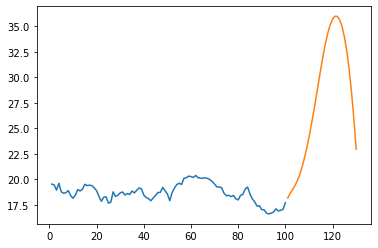

In [168]:
#Creating a dummy plane to plot graph one after another :

plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

plt.plot(plot_new, normalizer.inverse_transform(data_scaled[1601:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [169]:
data_new = data_scaled.tolist()
len(data_new)

1701

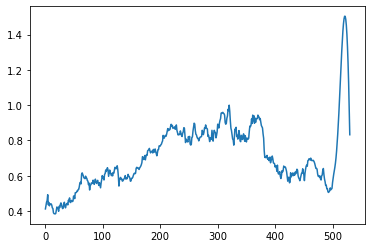

In [170]:
#Entends helps us to fill the missing value with approx value :
data_new.extend(lst_output)
plt.plot(data_new[1200:])

In [171]:
#Creating final data for plotting :

final_graph = normalizer.inverse_transform(data_new).tolist()

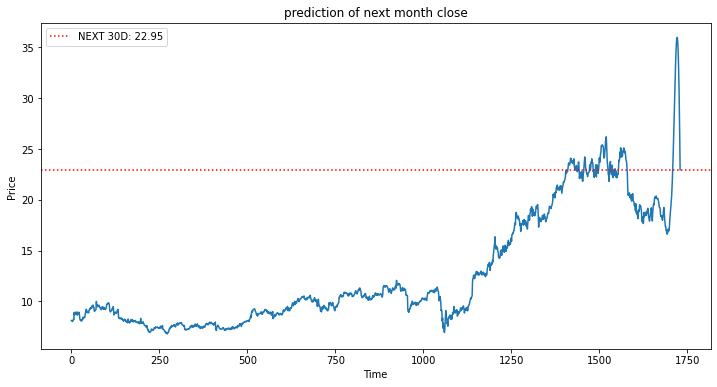

In [172]:
#Plotting final results with predicted value after 30 Days :

plt.figure(figsize=(12,6))
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("prediction of next month close")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [173]:
future_30days_data = normalizer.inverse_transform(lst_output)
future_30days_data

array([[18.1681],
       [18.6034],
       [18.9787],
       [19.3641],
       [19.8255],
       [20.4099],
       [21.1378],
       [22.0073],
       [23.0051],
       [24.1159],
       [25.3273],
       [26.6273],
       [27.9976],
       [29.4057],
       [30.8029],
       [32.1293],
       [33.3254],
       [34.3415],
       [35.1402],
       [35.6929],
       [35.9748],
       [35.963 ],
       [35.6371],
       [34.9795],
       [33.9732],
       [32.5979],
       [30.8281],
       [28.6355],
       [26.0021],
       [22.9509]])

# END================================================

In [176]:
import pickle 
pickle_out = open("model.pkl", mode = 'wb') 
pickle.dump(model, pickle_out) 

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-11-27 13:01:05         3474
metadata.json                                  2022-11-27 13:01:05      

In [181]:
from pickle import dump

In [182]:
dump(model,open('model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-11-27 13:38:42         3474
metadata.json                                  2022-11-27 13:38:42      

In [183]:
from pickle import load


In [184]:
loaded_model=load(open('model.pkl','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-11-27 13:38:42         3474
metadata.json                                  2022-11-27 13:38:42           64
variables.h5                                   2022-11-27 13:38:42       643480
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
........